In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
133,134,6.3,2.8,5.1,1.5,Iris-virginica
127,128,6.1,3.0,4.9,1.8,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
46,47,5.1,3.8,1.6,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor


In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.corr()

ValueError: could not convert string to float: 'Iris-setosa'

In [14]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from sklearn.preprocessing import StandardScaler

In [35]:
columns = df.columns

In [40]:
columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [42]:
sc = StandardScaler()
for i in columns:
  df[i] = sc.fit_transform(df[i].values.reshape(-1,1))

In [43]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.021849,1.263460,-1.341272,-1.312977,-1.224745


In [44]:
X = df.drop('Species',axis=1)
y = df['Species']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=3)

In [49]:
kmeans.fit(X_train)

KMeans(n_clusters=3)

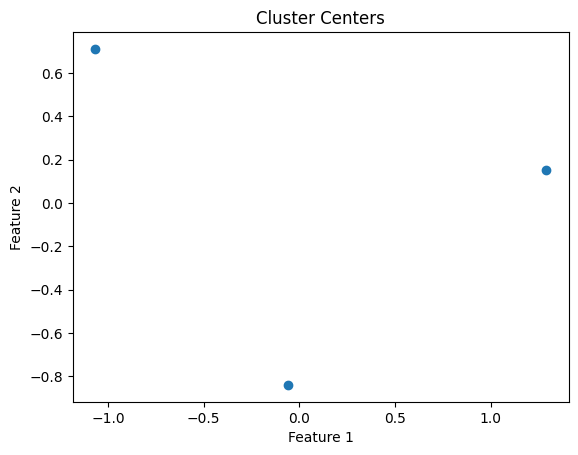

In [62]:
# Assuming 'kmeans.cluster_centers_' has at least 2 dimensions (features)
# We'll use the first two dimensions for x and y coordinates
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Cluster Centers")
plt.show()

In [64]:
kmeans.predict(X_test.iloc[[10]])

array([0], dtype=int32)

In [59]:
from sklearn.metrics import normalized_mutual_info_score,silhouette_score

In [57]:
print(normalized_mutual_info_score(y_test,y_pred))

0.6459821129037552


In [60]:
print(silhouette_score(X_test,y_pred))

0.4065988666515485


In [65]:
df.iloc[10]

,10
SepalLengthCm,-0.537178
SepalWidthCm,1.494863
PetalLengthCm,-1.284407
PetalWidthCm,-1.312977
Species,-1.224745
